# Data Preprocessing

Omkar Naik

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (2).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (285).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (166)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (290)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (300).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (390).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (357).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (430)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (89)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (261)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUS

# ***Load The DataSet***

In [4]:
Basepath='/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT' 
unique_classes=[]
for path in os.listdir(Basepath):
    unique_classes.append(path)
print(unique_classes)    

['benign', 'normal', 'malignant']


# Index to Classes Label Encoding

In [5]:
classindex=[unique_classes[1],unique_classes[0],unique_classes[2]]
for i in classindex:
    print(i,':',classindex.index(i))

normal : 0
benign : 1
malignant : 2


In [11]:
image_paths = []
mask_paths = []
labels=[]
for folder in os.listdir(Basepath):
    class_path=os.path.join(Basepath,folder)
    for img in os.listdir(class_path):
        print(img)
        if '_mask' not in img:
            img_path=os.path.join(class_path,img)
            print(img_path)
            mask_path=img_path.replace(".png","_mask.png")
            print(mask_path)
            
            if os.path.exists(mask_path):
                image_paths.append(img_path)
                mask_paths.append(mask_path)
                labels.append(folder)

#print(mask_paths)

benign (2).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (2).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (2)_mask.png
benign (285).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (285).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (285)_mask.png
benign (166)_mask.png
benign (290)_mask.png
benign (300).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (300).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (300)_mask.png
benign (390).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (390).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (390)_mask.png
benign (357).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (357).png
/kaggle/input/breast-ultrasou

In [ ]:
import cv2
import scipy
importb scipy.ndimage

def load_image(img_path):
    img=cv2.imread(img_path,0)
    return img

#def padding(img,msk):
 
def load_data(img_path,msk_path,label):
    img=load_image(img_path)
    msk=load_image(msk_path)
    label_indx=class_index.index(label)

In [12]:
framObjTrain = {'img' : [],
           'mask' : []
          }

## defining data Loader function
def LoadData( frameObj = None, imgPath = None, maskPath = None, shape = 256):
    imgNames = os.listdir(imgPath)
    
    names = []
    maskNames = []
    unames = []
    
    for i in range(len(imgNames)):
        unames.append(imgNames[i].split(')')[0])
    
    unames = list(set(unames))
    
    for i in range(len(unames)):
        names.append(unames[i]+').png')
        maskNames.append(unames[i]+')_mask.png')
    
    imgAddr = imgPath + '/'
    maskAddr = maskPath + '/'
    
    for i in range (len(names)):
        img = plt.imread(imgAddr + names[i])
        mask = plt.imread(maskAddr + maskNames[i])
        
        img = cv2.resize(img, (shape, shape)) 
        mask = cv2.resize(mask, (shape, shape))
        
        frameObj['img'].append(img)
        frameObj['mask'].append(mask)
        
    return frameObj


In [14]:
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [15]:
# loading benign samples

framObjTrain = LoadData( framObjTrain, imgPath = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign'
                        , maskPath = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign'
                         , shape = 256)

In [16]:
framObjTrain = LoadData( framObjTrain, imgPath = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant'
                        , maskPath = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant'
                         , shape = 256)

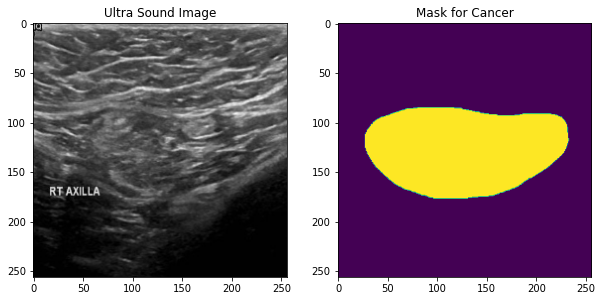

In [18]:
plt.figure(figsize = (10, 7))
plt.subplot(1,2,1)
plt.imshow(framObjTrain['img'][2])
plt.title('Ultra Sound Image')
plt.subplot(1,2,2)
plt.imshow(framObjTrain['mask'][2])
plt.title('Mask for Cancer')
plt.show()